# Real Gas Properties

[NIST](https://www.nist.gov/) maintains a [Thermophysical Property Database](https://webbook.nist.gov/chemistry/fluid/) for fluids that allows for the determination of the following thermodynamic state variables:

1. Density, $\rho$

2. Heat Capacities $C_P$ and $C_V$

3. Ethalpy $\underline{H}$, Entropy $\underline{S}$, and Internal Energy $\underline{U}$

4. Logarithmic Scales

and many others relevant to solving thermodynamic problems.

## Using the NIST Property Database to access thermophysical property data of common fluids.

Steps to access data-sets via the web.

1. Go to https://webbook.nist.gov/chemistry/fluid/

2. Select the species of interest (default is water)

3. Select the units desired. For this class, the following units are useful:

    - T (K)
    
    - P (bar)
    
    - Energy (kJ/mol)
    
4. Choose the desired type of data: (select from)

    - **Isothermal Properties** - Defines *thermal variables* as a function of pressure for a fixed **temperature**
    
    - **Isobaric Properties** - Defines *thermal variables* as a function of temperature for a fixed **pressure**
    
    - **Isochoric Properties** - Defines *thermal variables* as a function of temperature for a fixed **density**
    
    - **Saturation Properties** - Defines the VLE envolope
    
5. After selecting the desired property range and increment and constant property, a window will be displayed that displays the thermophysical property data on a graph and also allows for a tab-delimited datafile to be downloaded.

### Worksheet Problem:

Steam $10$ $kg/s$ at $T=600^{o}C$ and $P=10 bar$ is exapanded across an well-designed, adiabatic turbine to a final pressure of $1$ $bar$. Using the NIST property database, determine the following:

1. Find the outlet temperature of the steam.

2. Find the maximum work that can be generated due to the expansion.

Check your work with the steam tables.

#### Solution:

In  order to proceed, I need thermophysical properties of steam. I will use the steps above to obtain those properties.

1. First, I will set the units on the property page to reflect the units in this problem (this will make the calculations easy)

    - T (C)
    
    - P (bar)
    
    - Energy (kJ/kg)
    
    
2. I will simplify the mass, energy, and entropy balance expressions to understand which properties I need to solve the problem. For a well-designed, adiabatic turbine operating at steady state the expansion is **isoentropic** and the is described by the following set of equations.

    - Mass balance: $\quad \dot{N}_1=\dot{N}_2$
    
    - Energy Balance: $\quad \dot{W}_s=\dot{N}_1\big(\underline{H}_2-\underline{H}_1\big)$
    
    - Entropy Balance: $\quad \underline{S}_2=\underline{S}_1$
    
3. As we have seen in prior examples, I know that to find the outlet temperature, I need to identify the temperature where the entropy of the inlet fluid is equal to the entropy of the outlet fluid, $\underline{S}_2=\underline{S}_1$. To do this, I need isobaric data as a function of temperature for both the specified inlet and outlet conditions. For this we will use the property database.

    - I start with the inlet condition and save the resulting data as "Steam_Isobar P=10bar.txt"

    - I do the same steps with the outlet condition and save the resulting data as "Steam_Isobar P=1bar.txt"
    
4. We will load the data with pandas, plot the data with matplotlib, and interpolate the data with numpy. The package os is convenient for file handling.

#### Import the Necessary Libraries:

First let's import the necessary libraries. We will use:

1. pandas for loading data

2. os for file manipulation

3. matplotlib for plotting the data

4. numpy for interpolation


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

#### Load the data:

Next we load the data using pandas read_csv function. Note below we have to specify the absolution file path. We do so by concatenating our current working directory with the directory where the data is saved. We load the separate isobar data into separate dataframes and indicate that it is tab delimited and that the loader should skip the first row when loading data as the header can be found in the first row. The header is tab-delimited as well and has the names of the columns stored generated by the NIST Property database.

In [2]:
pathtofile=os.getcwd()+"//data//"
##load the data as tab delimited file - skip first row which has the header info
Isobar1 = pd.read_csv(os.path.join(pathtofile,"Steam_Isobar P=10bar.txt"),sep='\t',skiprows=(0),header=(0))
Isobar2 = pd.read_csv(os.path.join(pathtofile,"Steam_Isobar P=1bar.txt"),sep='\t',skiprows=(0),header=(0))

#### Plot the data

For this purpose, I will construct a Temperature-Entropy Diagram for these two isobars, which should allow me to easily identify the **isoentropic pathway**. To remind myself of the units and the names of the columns, I will invoke the "keys()" property of the 

In [3]:
Isobar1.keys()


Index(['Temperature (C)', 'Pressure (bar)', 'Density (mol/l)',
       'Volume (l/mol)', 'Internal Energy (kJ/kg)', 'Enthalpy (kJ/kg)',
       'Entropy (J/g*K)', 'Cv (J/g*K)', 'Cp (J/g*K)', 'Sound Spd. (m/s)',
       'Joule-Thomson (K/bar)', 'Viscosity (uPa*s)', 'Therm. Cond. (W/m*K)',
       'Phase'],
      dtype='object')

Now we can see that the **Enthalpy** and **Temperature** keys are strings with the units specified

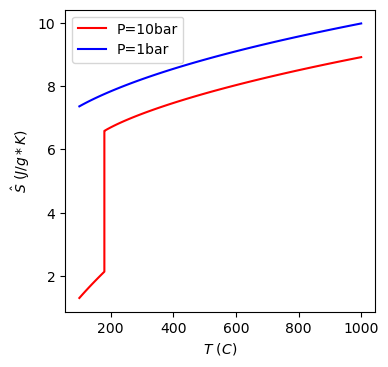

In [4]:
%matplotlib inline
plt.figure(dpi=100,figsize=(4,4))
plt.plot(Isobar1['Temperature (C)'],Isobar1['Entropy (J/g*K)'],c='r',label='P=10bar')
plt.plot(Isobar2['Temperature (C)'],Isobar2['Entropy (J/g*K)'],c='b',label='P=1bar')
plt.xlabel(r'$T$ $(C)$')
plt.ylabel(r'$\hat{S}$ $(J/g*K)$')
plt.legend()

#### Determine the outlet temperature using Numpy

To determine the outlet temperature, we first need to find the entropy of the inlet, we for this we will use numpy's interp function, which has as an argument the desired temperature for the interpolation and x, y arrays to perform the interpolation.

In [5]:
T1=600##C
S1=np.interp(T1,Isobar1['Temperature (C)'],Isobar1['Entropy (J/g*K)'])
print('S (P=10 bar)=',S1, 'J/g*K')

S (P=10 bar)= 8.031 J/g*K


We can now use this to find the outlet temperature by interpolating the entropy of interest with the caveat that the data is a monotonic function of temperature in the interpolated ranage.

In [6]:
T2=np.interp(S1,Isobar2['Entropy (J/g*K)'],Isobar2['Temperature (C)'])
S2=S1
print('T (P=1 bar)=%3.2f'%T2, '(C)')

T (P=1 bar)=249.06 (C)


#### Determine the Work

We can use the same strategy to find the enthalpies.

In [7]:
H1=np.interp(T1,Isobar2['Temperature (C)'],Isobar2['Enthalpy (kJ/kg)'])
H2=np.interp(T2,Isobar2['Temperature (C)'],Isobar2['Enthalpy (kJ/kg)'])
N1=10##kg/s

print("The change in enthalpy is given as: W=%3.2f kJ/kg"%(H2-H1))
print("The available work to extract from the system is given as: W=%3.2f kW"%(-N1*(H2-H1)))

The change in enthalpy is given as: W=-732.97 kJ/kg
The available work to extract from the system is given as: W=7329.66 kW
